In [13]:
import requests
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt

In [21]:
# Listes des paramètres

url_service='https://api.geosas.fr/edr/collections/safran-isba/'
r=requests.get(url_service)
data_info=r.json()
if r.status_code == 200:
    print("Listes des paramètres: ")
else :
    print("Erreur code : vérifier url", r.status_code)
print(f"")
for parametre in data_info['parameter_names']:
    name = list(parametre.keys())[0]
    description = parametre[name]['description']
    unit_info = parametre[name]['unit']
    unit_label = unit_info['label']
    unit_symbol = unit_info['symbol']['value']  
    print(f"{name}: {description}|{unit_label} ({unit_symbol})")
    print(f"")

Listes des paramètres: 

DRAINC_Q: Drainage (cumul quotidien 06-06 UTC)|millimetre (mm)

ETP_Q: Evapotranspiration potentielle (formule de Penman-Monteith)|millimetre (mm)

FF_Q: Vent (moyenne quotidienne)|mètre par seconde (m/s)

PRELIQ_Q: Précipitations liquides (cumul quotidien 06-06 UTC)|millimetre (mm)

PRENEI_Q: Précipitations solide (cumul quotidien 06-06 UTC)|millimetre (mm)

SSI_Q: Rayonnement atmosphérique (cumul quotidien)|Joule par centimètre² (J/cm²)

SWI_Q: Indice d'humidité des sols (moyenne quotidienne 06-06 UTC)|Pourcentage (%)

TINF_H_Q: Température minimale des 24 températures horaires|degrée Celcius (°C)

TSUP_H_Q: Température maximale des 24 températures horaires|degrée Celcius (°C)

T_Q: Température (moyenne quotidienne)|degrée Celcius (°C)



In [24]:
# Générer une API avec selon coordonnée GPS
param_name='PRELIQ_Q'
coord='POINT(605919.829 6385555.403)' # POINT(X=605919.829 Y=6385555.403)
projection='EPSG:2154'#Lambert 93
formatage='CoverageJSON'
date='2024-02-01/2024-02-29'
requete=f'https://api.geosas.fr/edr/collections/safran-isba/position?coords={coord}&crs={projection}&parameter-name={param_name}&f={formatage}&datetime={date}'
print(requete)
r=requests.get(requete)
data=r.json()
if r.status_code == 200:
    print("requete ok")
else :
    print("erreur code :", r.status_code)


https://api.geosas.fr/edr/collections/safran-isba/position?coords=POINT(605919.829 6385555.403)&crs=EPSG:2154&parameter-name=PRELIQ_Q&f=CoverageJSON&datetime=2024-02-01/2024-02-29
requete ok


In [25]:
# Exporter les résulats de la requette dans un tableau

date_value=data['domain']['axes']['t']['values']
values=data['ranges'][param_name]['values']

df=pd.DataFrame()
df[param_name]=values
df['date']=pd.to_datetime(date_value, format='%Y-%m-%dT%H-%M-%SZ')
display(df)


,PRELIQ_Q,date
0,1.5,2024-02-01
1,0.2,2024-02-02
2,0.2,2024-02-03
3,0.3,2024-02-04
4,0.2,2024-02-05
5,0.0,2024-02-06
6,2.1,2024-02-07
7,1.4,2024-02-08
8,4.7,2024-02-09
9,20.4,2024-02-10


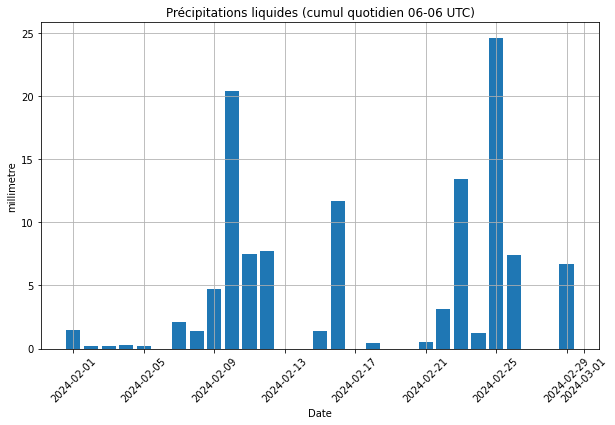

Cumul total (mm) : 116.59999878704548


In [27]:
# Présentation des résultats sous forme de graphe

for parametre in data_info['parameter_names']:
    name=list(parametre.keys())[0]
    if name==param_name:
        unit=parametre[name]['unit']['label']
        description=parametre[name]['description']
        break

plt.figure(figsize=(10, 6))
plt.bar(df['date'], df[param_name])
plt.title(description)
plt.xlabel('Date')
plt.ylabel(unit)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calcul du cumul total
cumulative_total = df[param_name].sum()
print('Cumul total (mm) :', cumulative_total)